In [52]:
# Unlocking Societal Trends in Aadhaar Enrolment

## Hackathon: UIDAI Data Hackathon 2026  
## Dataset: Aadhaar Enrolment Dataset  
## Objective: To identify demographic, regional, and temporal patterns in Aadhaar enrolment


In [53]:
### STAGE 0 - ENVIRONMENT SETUP 

# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [54]:
# Loading and merging Dataset

paths = [
    "api_data_aadhar_enrolment_0_500000.csv",
    "api_data_aadhar_enrolment_500000_1000000.csv",
    "api_data_aadhar_enrolment_1000000_1006029.csv",
]

dfs = [pd.read_csv(p) for p in paths]
df = pd.concat(dfs, ignore_index=True)

df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [55]:
### STAGE 1 - DATA CLEANING AND PREPROCESSING

df.shape

(1006029, 7)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [57]:
## CHECKING MISSING VALUES

df.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [58]:
## CONVERTING DATE COLUMN TO DATETIME

df['date'] = pd.to_datetime(df['date'],format='%d-%m-%Y', errors='coerce')

In [59]:
## CHECKING NULL VALUES AGAIN

df['date'].isnull().sum()

0

In [60]:
## REMOVING INVALID ROWS IF THEY EXIST

df = df.dropna(subset=['date'])

In [61]:
## CHECKING ON AGE WISE ENROLLMENT COLUMNS

(df[['age_0_5','age_5_17','age_18_greater']]< 0 ).sum()

age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [62]:
## CREATING TOTAL ENROLLMENT COLUMNS FOR CLEAN ANALYSIS

df['total_enrolments'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)


In [63]:
## FEATURE ENGINEERING (EXTRACTING DATE, MONTH, YEAR)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()


In [64]:
## HANDLING UNWANTED SPACES IN DATASET

df['state'] = df['state'].str.strip()
df['district'] = df['district'].str.strip()


In [65]:
## FINAL CHECK

df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolments,year,month,month_name
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,2025,3,March
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86,2025,3,March
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,2025,3,March
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106,2025,3,March
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51,2025,3,March


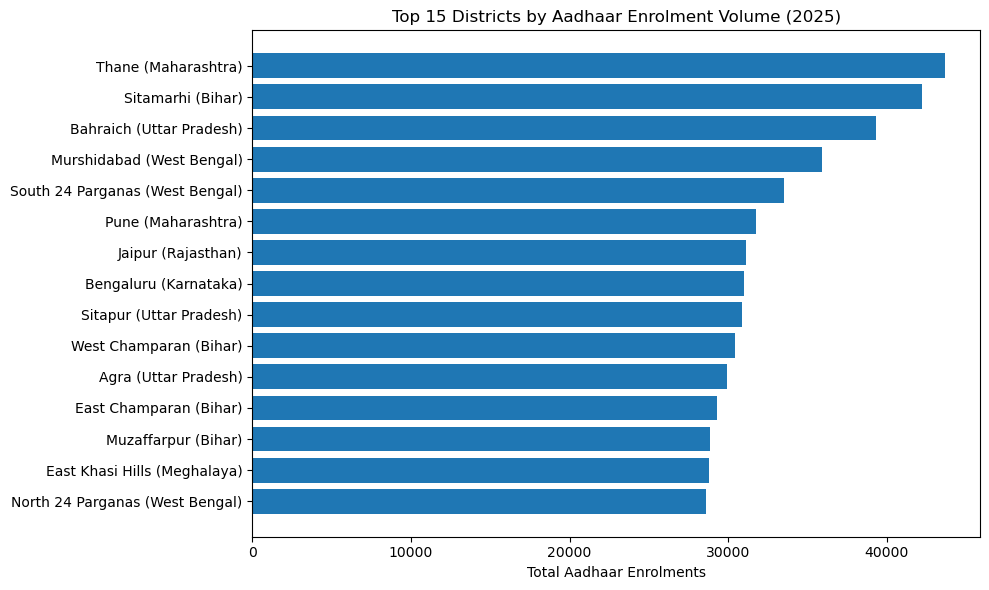

In [66]:
## STAGE 3 - UNIVARIATE ANALYSIS

# This analysis aims to understand the overall trend in Aadhaar enrolment activity.
# Q1. How does Aadhaar enrolment intensity vary across districts?


# total enrollment columns
df["total_enrolment"] = (
    df["age_0_5"] + df["age_5_17"] + df["age_18_greater"]
)


#district level
district_enrolment = (
    df.groupby(["state", "district"])["total_enrolment"]
    .sum()
    .reset_index()
)


# the plot
top_districts = district_enrolment.sort_values(
    "total_enrolment", ascending=False
).head(15)

plt.figure(figsize=(10, 6))
plt.barh(
    top_districts["district"] + " (" + top_districts["state"] + ")",
    top_districts["total_enrolment"]
)
plt.xlabel("Total Aadhaar Enrolments")
plt.title("Top 15 Districts by Aadhaar Enrolment Volume (2025)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()






In [67]:

# Insight:
# It’s clear that Aadhaar enrolment isn't spread out evenly. 
# We’re seeing a massive rush in two main areas: big cities like Thane, Pune, and Bengaluru, and heavily populated rural spots across Bihar, UP, and West Bengal. 
# This indicates concentrated enrolment demand in both metropolitan and high-population rural regions, highlighting the need for district-specific resource planning and enrolment infrastructure allocation.

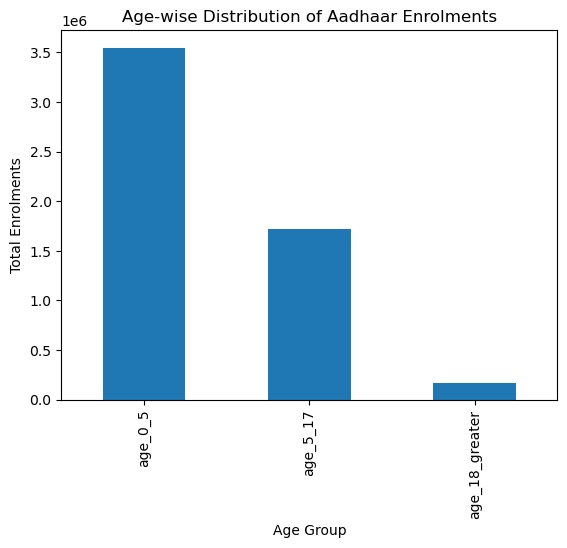

In [68]:
# This analysis helps identify which demographic group is driving Aadhaar enrolment activity.
### Q2. Which age group contributes the most to Aadhaar enrolments?

age_distribution = df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

plt.figure()
age_distribution.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Total Enrolments')
plt.title('Age-wise Distribution of Aadhaar Enrolments')
plt.show()



In [69]:
# Insight:  
# From the chart, we observe:

# 0–5 age group contributes the highest number of enrolments

# 5–17 age group also shows substantial enrolment activity

# 18+ age group has significantly lower enrolments in this dataset

### This suggests that:
# Enrolments among adults (18 years and above) are comparatively lower, suggesting that Aadhaar coverage among the adult population is largely saturated, while enrolment efforts are currently driven by early-age registrations.

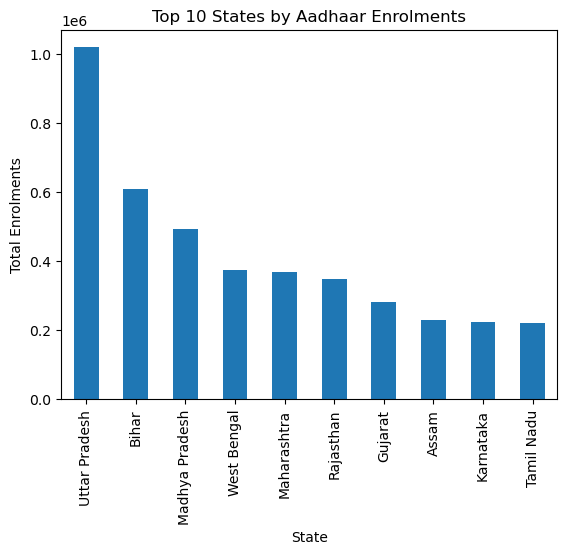

In [70]:
# This analysis identifies states with the highest enrolment activity, indicating population density or effective enrolment infrastructure.
# Q3. Which states record the highest Aadhaar enrolments?

state_enrolment = (
    df.groupby('state')['total_enrolments']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
state_enrolment.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Enrolments')
plt.title('Top 10 States by Aadhaar Enrolments')
plt.show()


In [71]:
### Insight:   
# From the chart:

# Uttar Pradesh records the highest Aadhaar enrolments by a significant margin
# Bihar and Madhya Pradesh also show high enrolment activity
# Large and populous states dominate the top rankings
# Southern and western states appear with comparatively lower enrolment volumes

### This suggests
# States with larger populations dominate enrolment volumes, indicating a strong relationship between population size and enrolment activity.
# This highlights the need for proportionate infrastructure and resource allocation in high-population states to ensure efficient Aadhaar services.

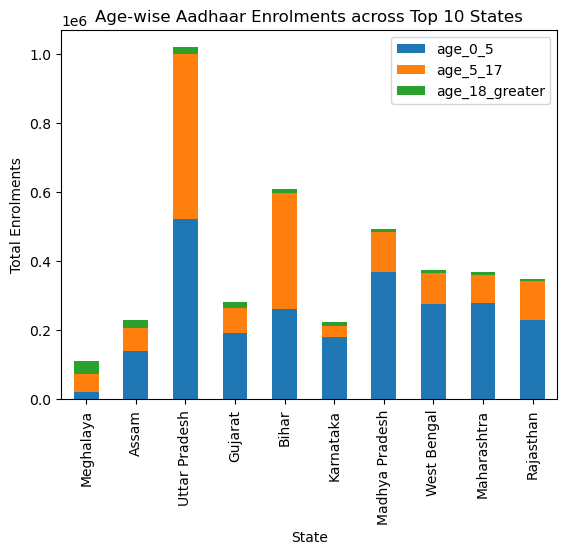

In [72]:
## STAGE 4 - BIVARIATE ANALYSIS
# This stage examines the relationship between two variables to uncover deeper patterns in Aadhaar enrolment across demographic, geographic, and temporal dimensions.


# This analysis compares enrolment patterns of different age groups across states to identify demographic disparities.
### Q1. How does age-wise Aadhaar enrolment vary across states?


state_age = (
    df.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum()
    .sort_values(by='age_18_greater', ascending=False)
    .head(10)
)

state_age.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Total Enrolments')
plt.title('Age-wise Aadhaar Enrolments across Top 10 States')
plt.show()



In [73]:
### Insight:  

# From the chart, we can conclude

# Youth Dominance: Enrolments are overwhelmingly concentrated in the 0–5 and 5–17 age groups across all states.
# Adult Saturation: The 18+ category (green) is the smallest segment everywhere, indicating that adult registration is nearly complete.
# State Leader: Uttar Pradesh significantly leads in total volume, followed by Bihar and Madhya Pradesh. High volumes in UP and Bihar reflect larger child populations and active registration drives for minors.


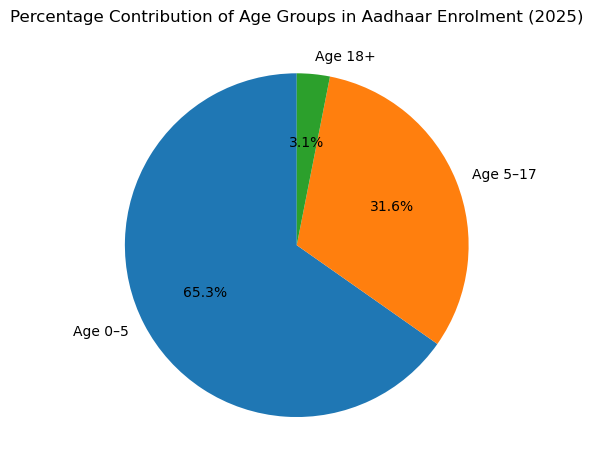

In [74]:

### Q2. Percentage contribution of each age group in Aadhaar enrolment

# Calculate totals
total_enrolments = df[["age_0_5", "age_5_17", "age_18_greater"]].sum()

# Plot
plt.figure()
plt.pie(
    total_enrolments,
    labels=["Age 0–5", "Age 5–17", "Age 18+"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Percentage Contribution of Age Groups in Aadhaar Enrolment (2025)")
plt.tight_layout()
plt.show()



In [75]:
### Insight:   

# From the chart:

# Dominant Group: Children aged 0–5 make up the largest share of enrolments at 65.3%. This shows a clear shift toward capturing citizens at birth.
# School-Age Contribution: The 5–17 age group accounts for nearly a third of total enrolments (31.6%). 
# Minimal Adult Enrolment: Adults (18+) contribute the smallest fraction at only 3.1% This indicates that adult enrolment has reached a state of near-total saturation.



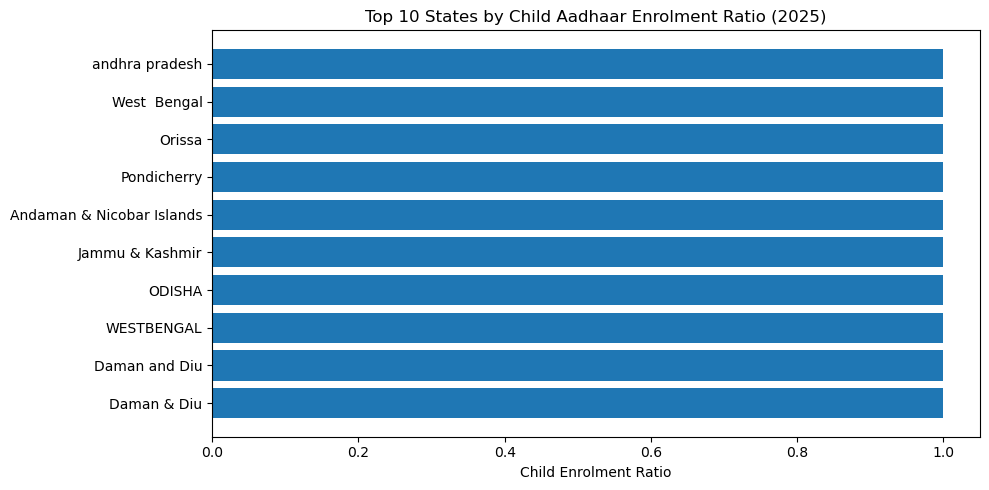

In [76]:
# This analysis identifies states where early-age Aadhaar enrolment is comparatively stronger.
### Q3. Which states show relatively higher child enrolment compared to adult enrolment?

# Aggregate state-level data
state_data = df.groupby("state")[["age_0_5", "age_5_17", "age_18_greater"]].sum()

# Calculate child enrolment ratio
state_data["child_ratio"] = (
    state_data["age_0_5"] + state_data["age_5_17"]
) / (
    state_data["age_0_5"] + state_data["age_5_17"] + state_data["age_18_greater"]
)

# Select top 10 states
top_states = state_data.sort_values("child_ratio", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(top_states.index, top_states["child_ratio"])
plt.xlabel("Child Enrolment Ratio")
plt.title("Top 10 States by Child Aadhaar Enrolment Ratio (2025)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [77]:
### Insight:   

# Perfect Saturation: Several states and UTs, including Andhra Pradesh, West Bengal, and Odisha, have reached a 1.0 Child Enrolment Ratio, indicating near-universal Aadhaar coverage for children in these regions.
# Effective Child Outreach: The presence of both large states and smaller UTs (like Pondicherry and Daman & Diu) suggests that child-focused registration drives are successful across varying geographic scales.
# Near-Zero Adult Gap: In these top-performing regions, child enrollment is no longer lagging behind adult enrollment, representing a fully matured registration ecosystem for all age groups.

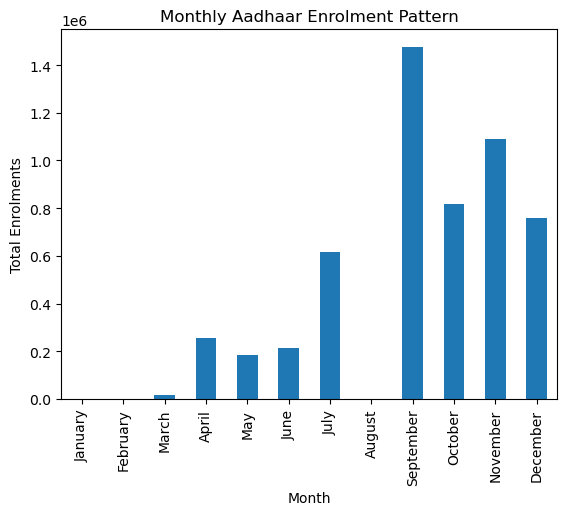

In [78]:
# This analysis explores whether enrolment activity varies across different months.
### Q4. Is there a seasonal pattern in Aadhaar enrolments?

monthly_enrolment = df.groupby('month_name')['total_enrolments'].sum()

monthly_enrolment = monthly_enrolment.reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure()
monthly_enrolment.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Enrolments')
plt.title('Monthly Aadhaar Enrolment Pattern')
plt.show()


In [79]:
### Insight:   

# Year-End Surge: A strong seasonal trend is visible, with the vast majority of enrolments occurring between September and December.

# Educational Alignment: The spike starting in July/September likely aligns with school admission cycles and requirements for updated student documentation.

# First Quarter Lull: The near-absence of data in Q1 (Jan–Mar) suggests either a seasonal pause in registration drives or a specific administrative reporting cycle.

# September Peak: September stands out as the most critical month, accounting for the highest volume of total Aadhaar enrolments in the period shown.


In [80]:
## CHECKING THE YEAR TO WHICH THE DATASET BELONGS.

df['year'].value_counts()


year
2025    1006029
Name: count, dtype: int64

In [81]:
### NOTE - DATA LIMITATION 
## The available Aadhaar enrolment dataset covers a limited temporal window (year 2025 only). 
## As a result, long-term trend analysis and forecasting are constrained. 
## The analysis will now focus on cross-sectional demographic and geographic patterns to derive actionable insights.


<Figure size 640x480 with 0 Axes>

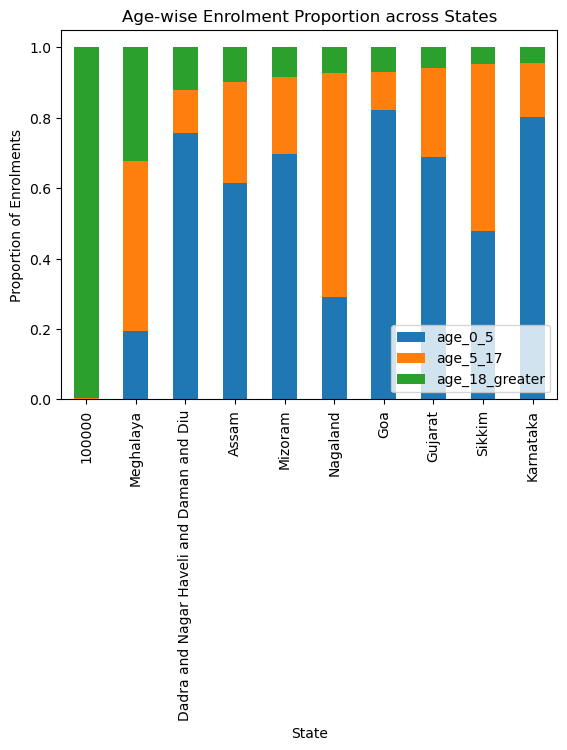

In [82]:
## STAGE 5 - TRIVARIATE ANALYSIS
### Q1. Which states exhibit significant imbalance in age-wise Aadhaar enrolments?


state_age_prop = (
    df.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum()
)

state_age_prop = state_age_prop.div(state_age_prop.sum(axis=1), axis=0)

top_states = state_age_prop.sort_values('age_18_greater', ascending=False).head(10)

plt.figure()
top_states.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Proportion of Enrolments')
plt.title('Age-wise Enrolment Proportion across States')
plt.show()


In [83]:
### Insight:   

# Demographic Imbalance: Most states have moved into a "maintenance" phase where enrolments are 80-90% children, as adult coverage is already fully saturated.

# Data Anomaly: The entry for "100000" is a significant outlier, showing almost exclusively adult enrolments, which contradicts the national trend of child-led growth.

# Regional Variation: Meghalaya shows the most significant ongoing adult enrolment activity, suggesting it may still be working toward universal coverage for its mature population.

# Infant Focus: In high-performing states like Goa and Karnataka, the focus has shifted almost entirely to newborns, with the 0–5 age group forming the core of all new registration activity.

In [84]:
### Q2. Are there districts with unusually high Aadhaar enrolment activity?

district_enrolment = df.groupby('district')['total_enrolments'].sum()

threshold = district_enrolment.mean() + 2 * district_enrolment.std()
outlier_districts = district_enrolment[district_enrolment > threshold]

outlier_districts.sort_values(ascending=False).head(10)


district
Thane                43688
Sitamarhi            42232
Bahraich             39338
Murshidabad          35911
South 24 Parganas    33540
Pune                 31763
Jaipur               31146
Bengaluru            30980
Sitapur              30854
Hyderabad            30830
Name: total_enrolments, dtype: int64

In [85]:
### Insight:   

# Urban-Rural Hotspots: High activity is split between metropolitan centers like Thane or Pune and populous rural districts in Bihar and West Bengal, indicating broad-based registration drives.

# Regional Leaders: Thane and Sitamarhi stand out as the primary drivers of enrolment volume, significantly outperforming other major districts.

# Sustained Demand: All top 10 districts maintain a high baseline of 30,000+ enrolments, reflecting robust administrative capacity and consistent demand for new registrations.

In [86]:
### Q3. How does child enrolment vary across districts within high-enrolment states?

top_states_list = state_age_prop.sum(axis=1).sort_values(ascending=False).head(3).index

filtered = df[df['state'].isin(top_states_list)]

district_child = (
    filtered.groupby(['state', 'district'])['age_0_5']
    .sum()
    .reset_index()
)

district_child.head()


,state,district,age_0_5
0,100000,100000,0
1,Lakshadweep,Lakshadweep,192
2,Maharashtra,Ahilyanagar,12
3,Maharashtra,Ahmadnagar,9369
4,Maharashtra,Ahmed Nagar,277


In [87]:
### Insights:

# Intra-State Imbalance: High-performing states still exhibit internal "blind spots" where child enrolment is significantly lower in certain districts despite high overall state averages.

# Localized Enrollment Drives: Districts with high counts (like Ahmadnagar) likely benefit from permanent enrolment centers or targeted camps in schools and anganwadis.

# Saturation Gaps: The low numbers in districts like Ahilyanagar suggest either a smaller target population or a need for improved accessibility to enrolment services.

# Administrative Focus: Disparities highlight where state governments may need to redeploy staff to ensure universal coverage for children entering school-going age.